In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, sys, time, gzip
import pickle as pkl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
datasets = ['aotm2011', '30music']
TOPs = [5, 10, 20, 30, 50, 100, 200, 300, 500]#, 1000]

In [13]:
dix = 0

In [14]:
dataset_name = datasets[dix]
data_mlr = 'data/%s/setting1' % dataset_name
data_pla = 'data/%s/setting2' % dataset_name

In [15]:
perf_br1 = pkl.load(open(os.path.join(data_mlr, 'perf-br1.pkl'), 'rb'))
perf_br1

{'aotm2011': {'Test': {'Hit-Rate': {5: 0.002037258128094966,
    10: 0.004267092231542343,
    20: 0.007304099443219223,
    30: 0.009986434935105334,
    50: 0.014788249763578438,
    100: 0.024276317744211903,
    200: 0.03980738494100749,
    300: 0.053413120346921715,
    500: 0.07632332219998214,
    1000: 0.12413879252547974},
   'R-Precision': 0.0009217638965627175}}}

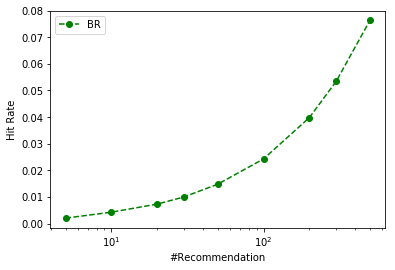

In [18]:
hitrates_br1 = perf_br1[dataset_name]['Test']['Hit-Rate']
#assert np.all(TOPs == sorted(hitrates_br1.keys()))
ax = plt.subplot(111)
ax.plot(TOPs, [hitrates_br1[t] for t in TOPs], ls='--', c='g', marker='o', label='BR')
ax.legend(loc='upper left')
ax.set_xlabel('#Recommendation')
ax.set_ylabel('Hit Rate')
ax.set_xscale('log')

In [19]:
perf_br2 = pkl.load(open(os.path.join(data_pla, 'perf-br2.pkl'), 'rb'))
perf_br2

{'aotm2011': {'Test': {'Hit-Rate': {5: 0.0025689113872080305,
    10: 0.0040436085026485605,
    20: 0.0068752311617703175,
    30: 0.009470601467714423,
    50: 0.01451484007258096,
    100: 0.02320954500276045,
    200: 0.037637848617184694,
    300: 0.049367276085280146,
    500: 0.0690716063042735,
    1000: 0.10602769423371815},
   'R-Precision': 0.002047527589028852}}}

In [20]:
perf_pop = pkl.load(open(os.path.join(data_pla, 'perf-pop.pkl'), 'rb'))
perf_pop

{'aotm2011': {'Test': {'Hit-Rate': {5: 0.0037007335109578267,
    10: 0.007267207856212396,
    20: 0.012838721554086673,
    30: 0.01655845730553857,
    50: 0.023467438981302585,
    100: 0.03985192702296024,
    200: 0.06703559651297722,
    300: 0.08651699692306024,
    500: 0.1194141649978842,
    1000: 0.18300560205378802},
   'R-Precision': 0.003671795096342878}}}

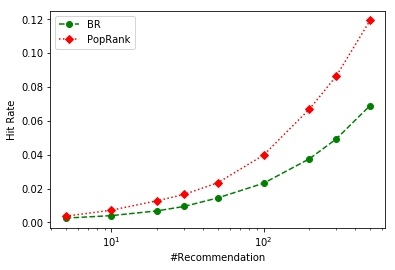

In [21]:
hitrates_br2 = perf_br2[dataset_name]['Test']['Hit-Rate']
hitrates_pop = perf_pop[dataset_name]['Test']['Hit-Rate']
#assert np.all(TOPs == sorted(hitrates_br2.keys()))
#assert np.all(TOPs == sorted(hitrates_pop.keys()))
ax = plt.subplot(111)
ax.plot(TOPs, [hitrates_br2[t] for t in TOPs], ls='--', c='g', marker='o', label='BR')
ax.plot(TOPs, [hitrates_pop[t] for t in TOPs], ls=':', c='r', marker='D', label='PopRank')
ax.legend(loc='upper left')
ax.set_xlabel('#Recommendation')
ax.set_ylabel('Hit Rate')
ax.set_xscale('log')
plt.savefig('pla_hitrate_%s.svg' % dataset_name)